### Import Library

In [1]:
import pandas as pd

import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_roc_curve, classification_report
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt 

/Users/ziwi/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/Users/ziwi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [2]:
import seaborn as sns

In /Users/ziwi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/ziwi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/ziwi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/ziwi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/ziwi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### Load Data

In [4]:
eshop_data = pd.read_csv ('./dataset/e-shop clothing 2008.csv',sep=';',index_col=None)
eshop_data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


### Feature Exploration

/Users/ziwi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


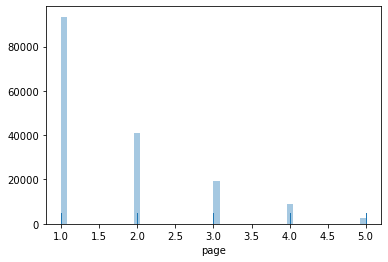

In [5]:

#Page exposure rate - Most viewed page
sns.distplot(eshop_data['page'], kde=False, rug=True);

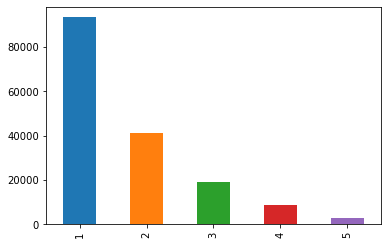

In [6]:
eshop_data['page'].value_counts().plot(kind='bar')

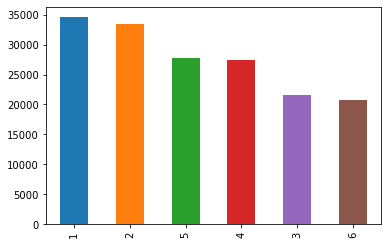

In [7]:
eshop_data['location'].value_counts().plot(kind='bar')

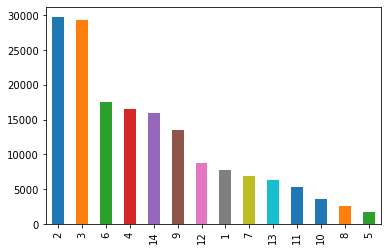

In [8]:
eshop_data['colour'].value_counts().plot(kind='bar')

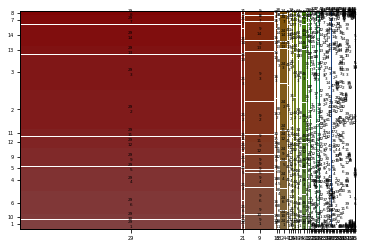

In [11]:
import matplotlib.pyplot as plt 

from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['font.size'] = 5.0
mosaic(eshop_data, ['country', 'colour']);

In [12]:
# check the correlation between binary variable and continuous value

# the correlation between price 2 and price
stats.pointbiserialr(eshop_data['price 2'], eshop_data['price'])

PointbiserialrResult(correlation=-0.7436333669872393, pvalue=0.0)

In [13]:
# the correlation between model photography type and price
stats.pointbiserialr(eshop_data['model photography'], eshop_data['price'])

PointbiserialrResult(correlation=-0.21239516402298592, pvalue=0.0)

In [33]:
# the association between colour and price
fvalue_colour, pvalue_colour = stats.f_oneway(eshop_data['colour'], eshop_data['price'])
print(fvalue_colour, pvalue_colour)

1332001.5795317418 0.0


In [18]:
# the association between country and price
fvalue_country, pvalue_country = stats.f_oneway(eshop_data['country'], eshop_data['price'])
print(fvalue_country, pvalue_country)

225234.24076582515 0.0


In [19]:
# the association between country and price
fvalue_location, pvalue_location = stats.f_oneway(eshop_data['location'], eshop_data['price'])
print(fvalue_location, pvalue_location)

1695939.9475700653 0.0


In [20]:
# the association between country and price
fvalue_cat, pvalue_cat = stats.f_oneway(eshop_data['page 1 (main category)'], eshop_data['price'])
print(fvalue_cat, pvalue_cat)

1786527.8615118428 0.0


### Data Preprocessing

In [20]:
eshop_selected = eshop_selected.dropna()

In [21]:
eshop_selected = eshop_data.iloc[:,[3,4,6,7,8,9,10,12,13]]
eshop_selected.head()

,order,country,page 1 (main category),page 2 (clothing model),colour,location,model photography,price 2,page
0,1,29,1,A13,1,5,1,2,1
1,2,29,1,A16,1,6,1,2,1
2,3,29,2,B4,10,2,1,1,1
3,4,29,2,B17,6,6,2,2,1
4,5,29,2,B8,4,3,2,1,1


In [31]:
#LabelEnconding & One-Hot Encoding through Pandas Getdummies
X = pd.get_dummies(eshop_selected.loc[:, eshop_selected.columns != 'price 2'])
Y = eshop_selected['price 2']
#Train-test Split with 0.33 split rate
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Regression Model

In [43]:
# Train the Logistic Regression Model
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = logisticRegr.predict(x_test)

### Measuring Model Performance

In [41]:
# Use score method to get accuracy of model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

99.99816873294633

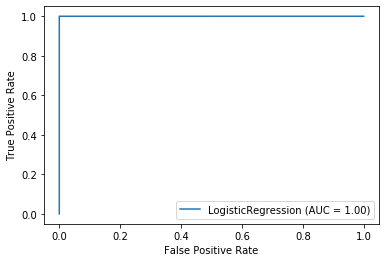

In [48]:
plot_roc_curve(logisticRegr, x_test, y_test)
plt.show()

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     28037
           2       1.00      1.00      1.00     26570

    accuracy                           1.00     54607
   macro avg       1.00      1.00      1.00     54607
weighted avg       1.00      1.00      1.00     54607

